INTRODUCTION

In [18]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from collections import defaultdict


pd.options.display.max_columns = 200
pd.options.display.max_rows = 5000

In [19]:
path = 'mxmh_survey_results.csv'

df = pd.read_csv(path)

print(df.shape)

(736, 33)


In [20]:
df.head()


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [16]:
#   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequency [EDM]               736 non-null    object 
 14  Frequency [Folk]              736 non-null    object 
 15  Frequency [Gospel]            736 non-null    object 
 16  Frequency [Hip hop]           736 non-null    object 
 17  Frequency [Jazz]              736 non-null    object 
 18  Frequency [K pop]             736 non-null    object 
 19  Frequency [Latin]             736 non-null    object 
 20  Frequency [Lofi]              736 non-null    object 
 21  Frequency [Metal]             736 non-null    object 
 22  Frequency [Pop]               736 non-null    object 
 23  Frequency [R&B]               736 non-null    object 
 24  Frequency [Rap]               736 non-null    object 
 25  Frequency [Rock]              736 non-null    object 
 26  Frequency [Video game music]  736 non-null    object 
 27  Anxiety                       736 non-null    float64
 28  Depression                    736 non-null    float64
 29  Insomnia                      736 non-null    float64
 30  OCD                           736 non-null    float64
 31  Music effects                 728 non-null    object 
 32  Permissions                   736 non-null    object 

SyntaxError: invalid syntax (940109789.py, line 2)

Distribution des genres musicaux préférés

Un graphique montrant la répartition des genres musicaux favoris parmi les participants. Cela donnerait un aperçu des préférences musicales de l'échantillon.

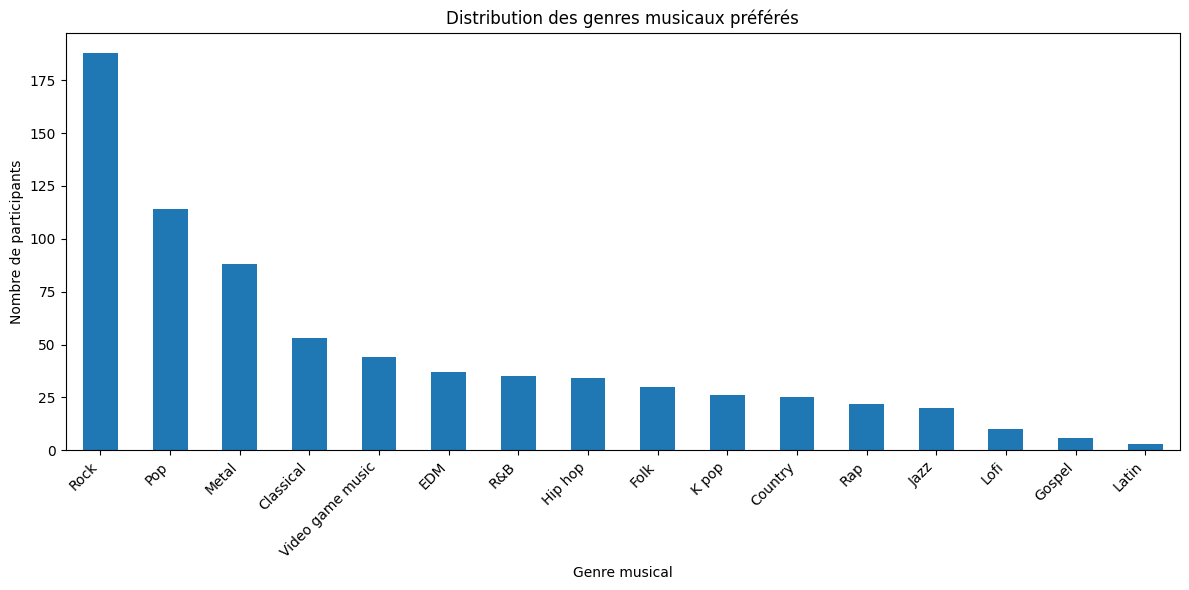

In [27]:
genre_counts = df['Fav genre'].value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Distribution des genres musicaux préférés')
plt.xlabel('Genre musical')
plt.ylabel('Nombre de participants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Corrélation entre le temps d'écoute et les niveaux d'anxiété/dépression

Un nuage de points comparant les heures d'écoute quotidiennes aux scores d'anxiété et de dépression. Cela pourrait révéler d'éventuelles relations entre le temps passé à écouter de la musique et la santé mentale.

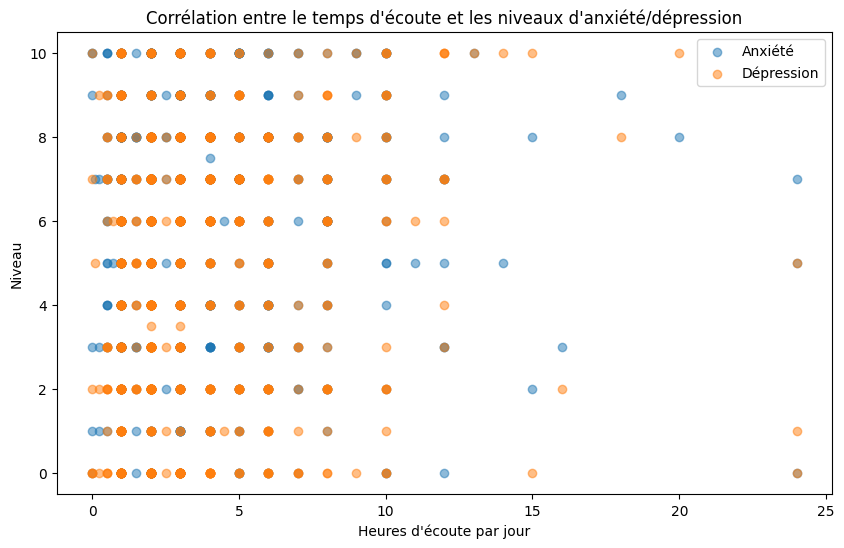

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours per day'], df['Anxiety'], alpha=0.5, label='Anxiété')
plt.scatter(df['Hours per day'], df['Depression'], alpha=0.5, label='Dépression')
plt.xlabel('Heures d\'écoute par jour')
plt.ylabel('Niveau')
plt.title('Corrélation entre le temps d\'écoute et les niveaux d\'anxiété/dépression')
plt.legend()
plt.show()

Impact perçu de la musique sur l'humeur

Un graphique en barres empilées illustrant la proportion de participants rapportant une amélioration, une détérioration ou aucun effet de la musique sur leur humeur, segmenté par genre musical préféré.

<Figure size 1200x600 with 0 Axes>

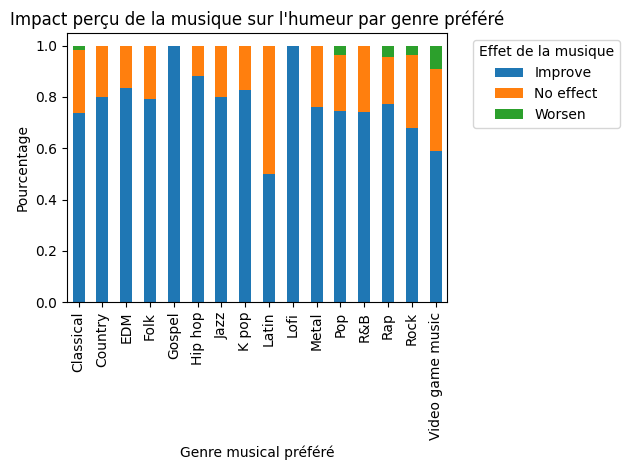

In [32]:
impact_counts = df.groupby(['Fav genre', 'Music effects']).size().unstack(fill_value=0)
impact_percentages = impact_counts.div(impact_counts.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
impact_percentages.plot(kind='bar', stacked=True)
plt.title('Impact perçu de la musique sur l\'humeur par genre préféré')
plt.xlabel('Genre musical préféré')
plt.ylabel('Pourcentage')
plt.legend(title='Effet de la musique', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Fréquence d'écoute par genre musical


Un graphique à barres montrant la fréquence d'écoute moyenne pour chaque genre musical. Cela mettrait en évidence les genres les plus et les moins populaires.

C:\Users\HP EliteBook 840 G3\AppData\Local\Temp\ipykernel_11996\2670084571.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[frequency_columns] = df[frequency_columns].replace(frequency_mapping)


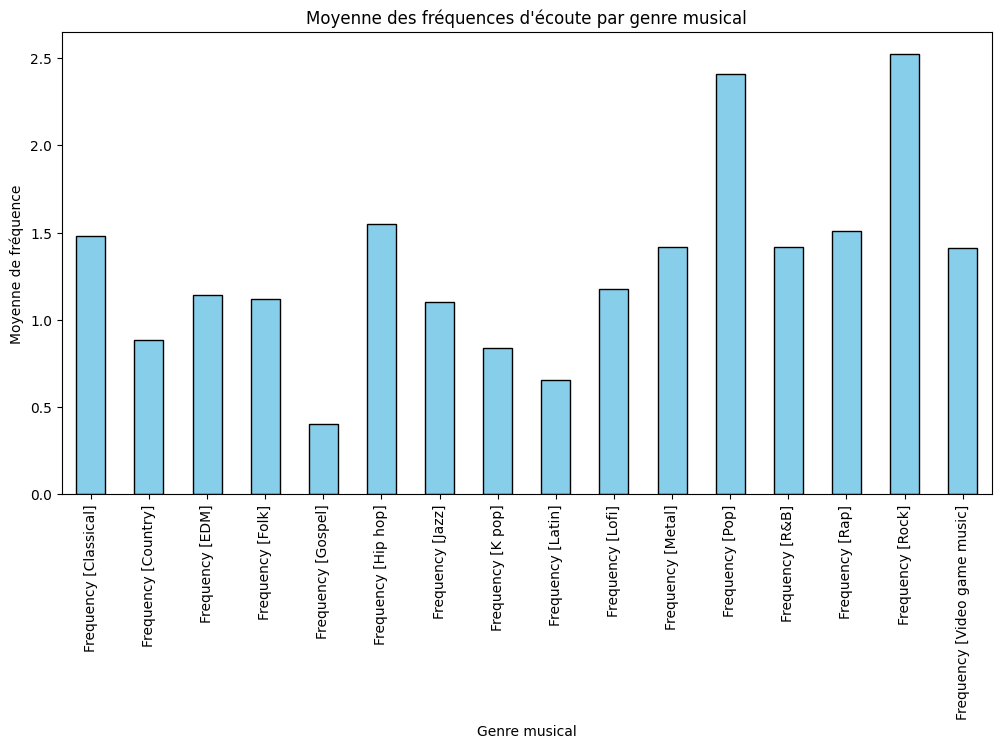

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données (en supposant qu'elles sont dans la variable `df`)
frequency_columns = [col for col in df.columns if col.startswith('Frequency')]

# Mapper les valeurs textuelles à des valeurs numériques
frequency_mapping = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Frequently': 3,
    'Very frequently': 4
}

# Appliquer le mapping sur les colonnes de fréquence
df[frequency_columns] = df[frequency_columns].replace(frequency_mapping)

# Calculer la moyenne des fréquences pour chaque genre
frequency_means = df[frequency_columns].mean()

# Tracer le graphique
plt.figure(figsize=(12, 6))
frequency_means.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Moyenne des fréquences d\'écoute par genre musical')
plt.xlabel('Genre musical')
plt.ylabel('Moyenne de fréquence')
plt.show()


Relation entre l'âge et les préférences musicales

Un graphique à bulles où l'axe Y représente l'âge, l'axe X les différents genres musicaux, et la taille des bulles indique la fréquence d'écoute. Cela pourrait révéler des tendances générationnelles dans les goûts musicaux.

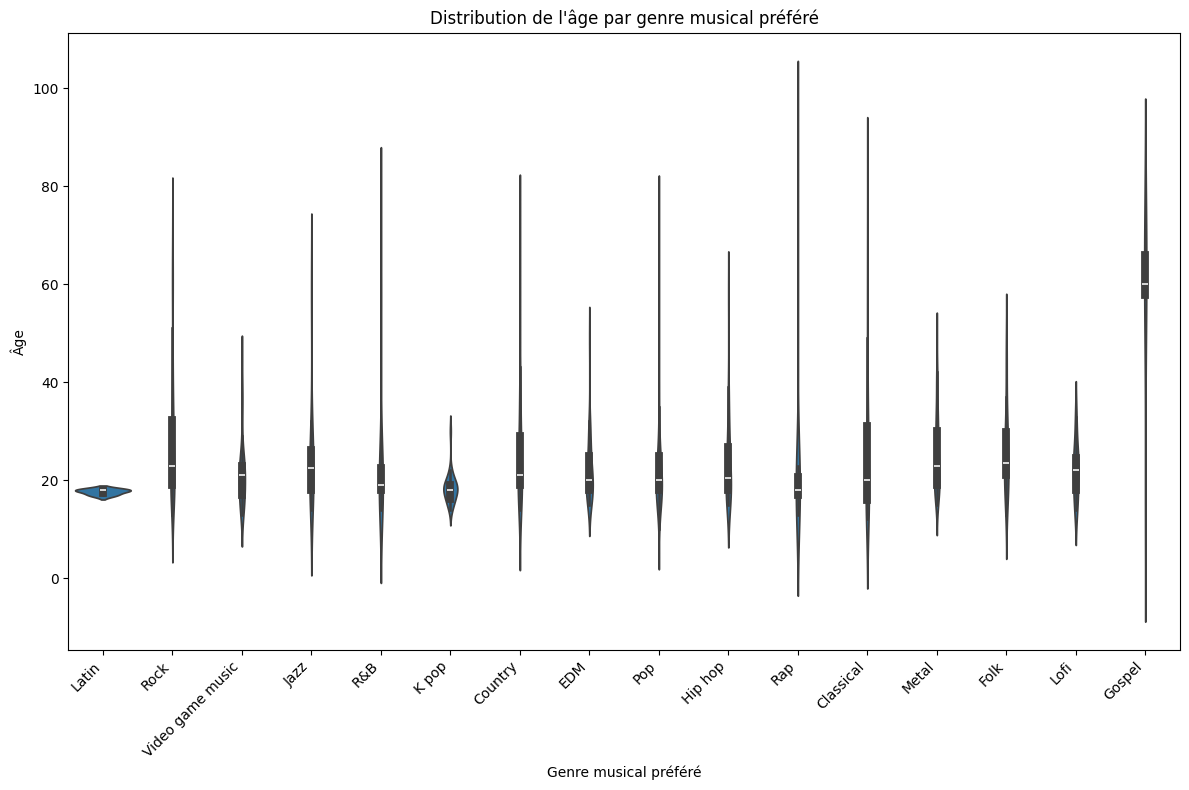

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.violinplot(x='Fav genre', y='Age', data=df)
plt.title('Distribution de l\'âge par genre musical préféré')
plt.xlabel('Genre musical préféré')
plt.ylabel('Âge')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Services de streaming préférés par tranche d'âge

Un graphique en barres empilées montrant la répartition des services de streaming utilisés pour différentes tranches d'âge.

C:\Users\HP EliteBook 840 G3\AppData\Local\Temp\ipykernel_11996\1451162202.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  streaming_by_age = df.groupby(['Age_Group', 'Primary streaming service']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

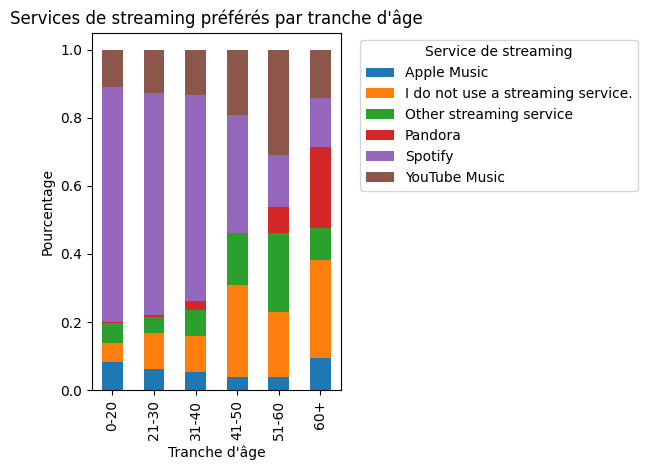

In [39]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])
streaming_by_age = df.groupby(['Age_Group', 'Primary streaming service']).size().unstack(fill_value=0)
streaming_percentages = streaming_by_age.div(streaming_by_age.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
streaming_percentages.plot(kind='bar', stacked=True)
plt.title('Services de streaming préférés par tranche d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Pourcentage')
plt.legend(title='Service de streaming', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Comparaison des niveaux d'anxiété/dépression entre musiciens et non-musiciens

Des boîtes à moustaches comparant les scores d'anxiété et de dépression entre les participants qui sont instrumentistes ou compositeurs et ceux qui ne le sont pas.

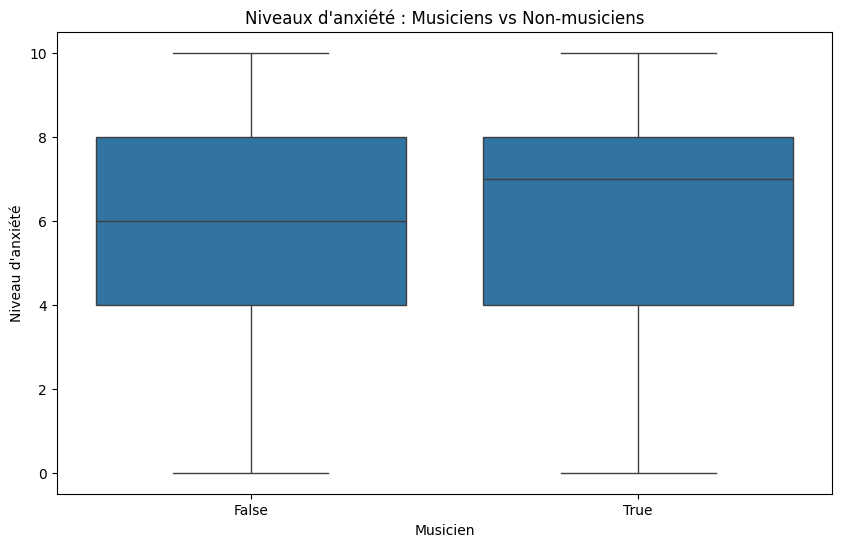

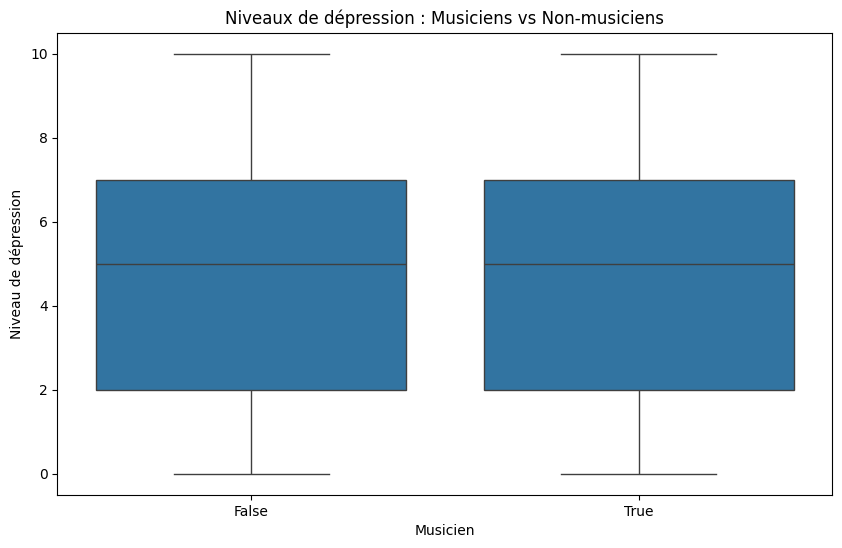

In [40]:
df['Is_Musician'] = (df['Instrumentalist'] == 'Yes') | (df['Composer'] == 'Yes')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Is_Musician', y='Anxiety', data=df)
plt.title('Niveaux d\'anxiété : Musiciens vs Non-musiciens')
plt.xlabel('Musicien')
plt.ylabel('Niveau d\'anxiété')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Is_Musician', y='Depression', data=df)
plt.title('Niveaux de dépression : Musiciens vs Non-musiciens')
plt.xlabel('Musicien')
plt.ylabel('Niveau de dépression')
plt.show()

Ces visualisations nous permettront de comparer facilement les préférences musicales des participants ayant des niveaux élevés d'anxiété, de dépression et d'insomnie.

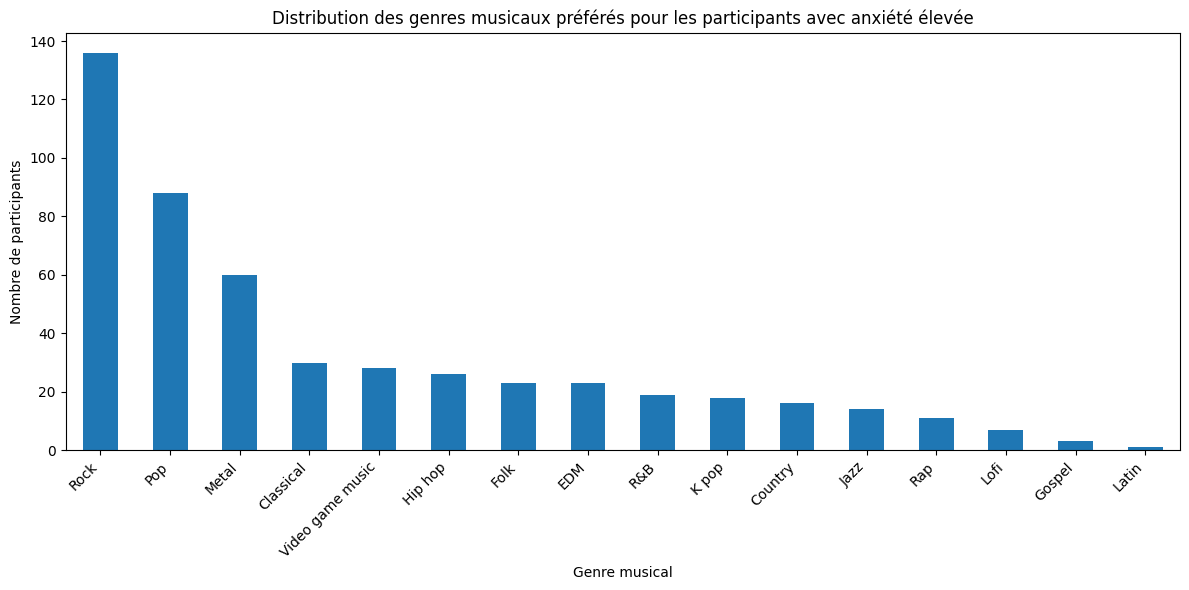

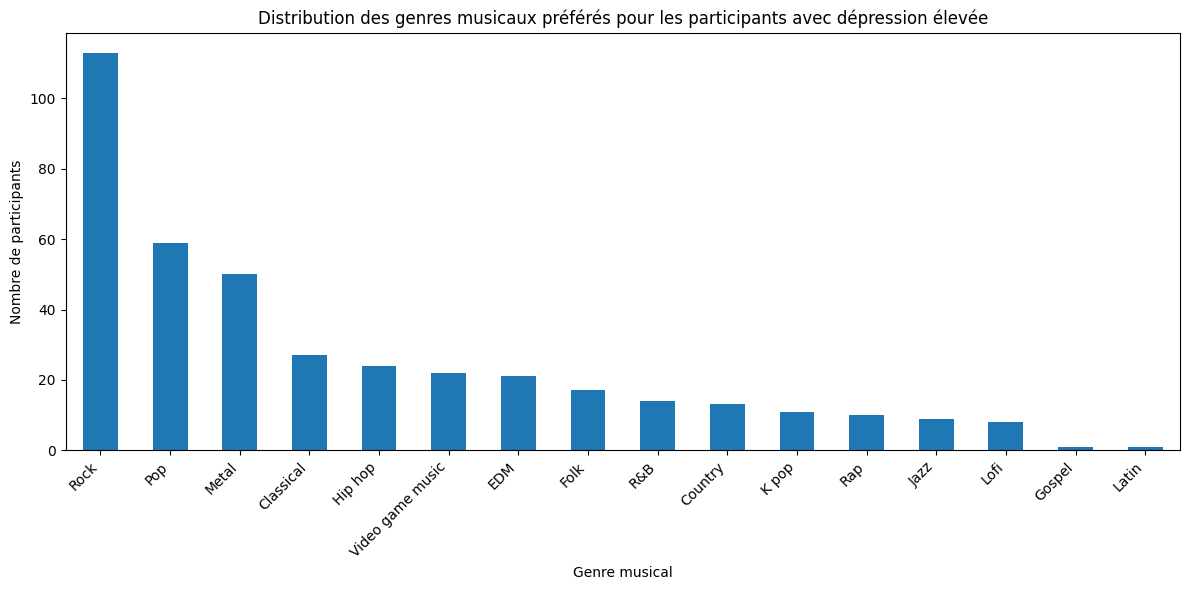

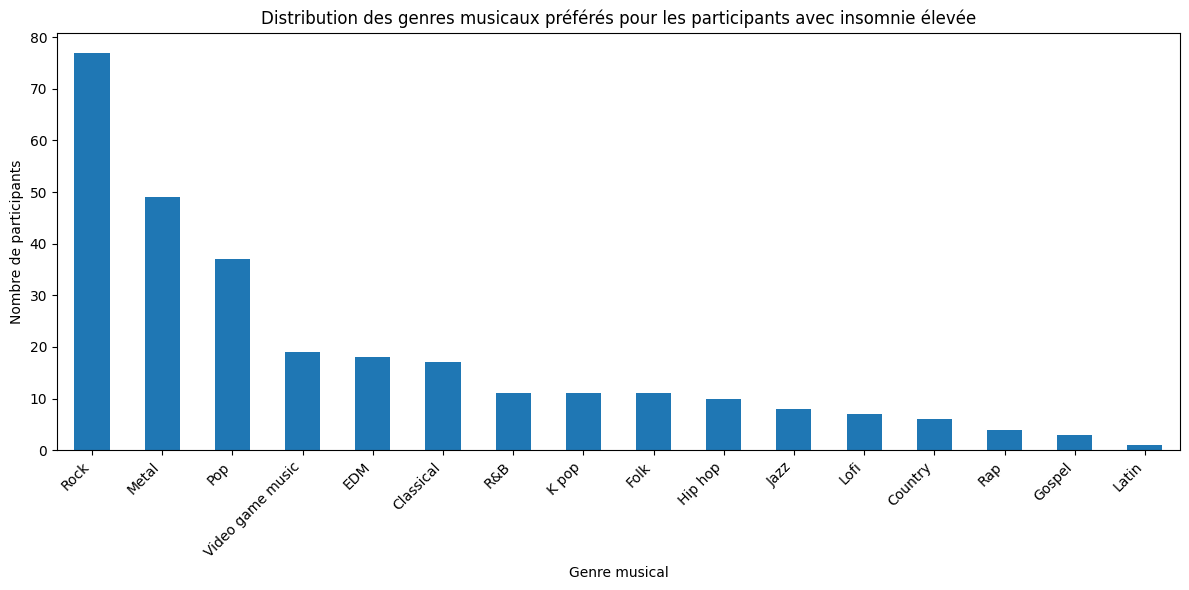

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('mxmh_survey_results.csv')

# Fonction pour créer un graphique de distribution des genres musicaux
def plot_genre_distribution(data, condition, title):
    genre_counts = data[data[condition] >= 5]['Fav genre'].value_counts()
    plt.figure(figsize=(12, 6))
    genre_counts.plot(kind='bar')
    plt.title(f'Distribution des genres musicaux préférés pour les participants avec {title} élevée')
    plt.xlabel('Genre musical')
    plt.ylabel('Nombre de participants')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Créer les trois graphiques
plot_genre_distribution(df, 'Anxiety', 'anxiété')
plot_genre_distribution(df, 'Depression', 'dépression')
plot_genre_distribution(df, 'Insomnia', 'insomnie')